# Daugman Algorithm

## Imports & prerequisites

In [1]:
import os
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from utils import *

In [2]:
base_dirs = {
        "images": "data/images",
        "extracted_irises": "data/extracted_irises",
        "irises": "data/irises",
        "pupils": "data/pupils",
    }

extracted_irises_dir = base_dirs["extracted_irises"]

## Sample image loaded

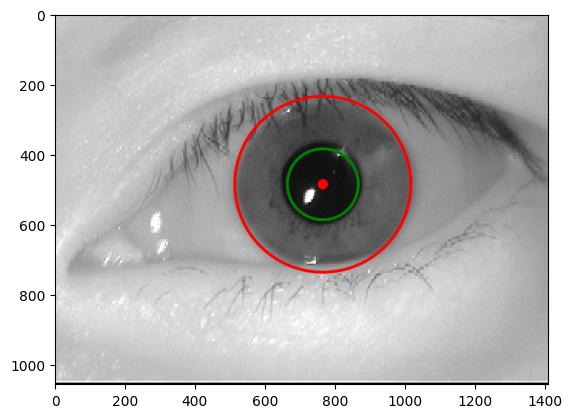

In [3]:
original_image = imread("data/images/left/38-1.png")
plt.imshow(original_image, cmap="gray")

(470, 1410)

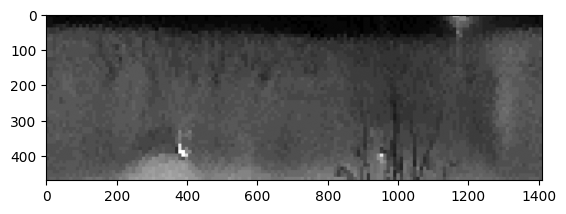

In [4]:
sample_image = imread("data/extracted_irises/left/38-1.png")[:, :, 0]
plt.imshow(sample_image, cmap="gray")
sample_image.shape

(440, 1410)

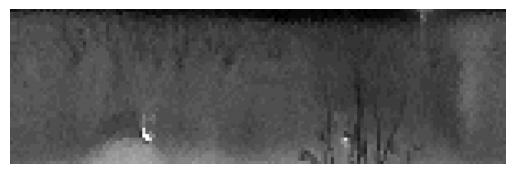

In [5]:
rows_to_remove = sample_image.shape[0] - 440 # so that it is divisible by 8 (like the 8 bands we use)
cropped_image = sample_image[rows_to_remove:, :]

plt.imshow(cropped_image, cmap="gray")
plt.axis("off")

cropped_image.shape

Frequency has a major effects both on the resulting code as well as the distance difference between different people

## Effect on code

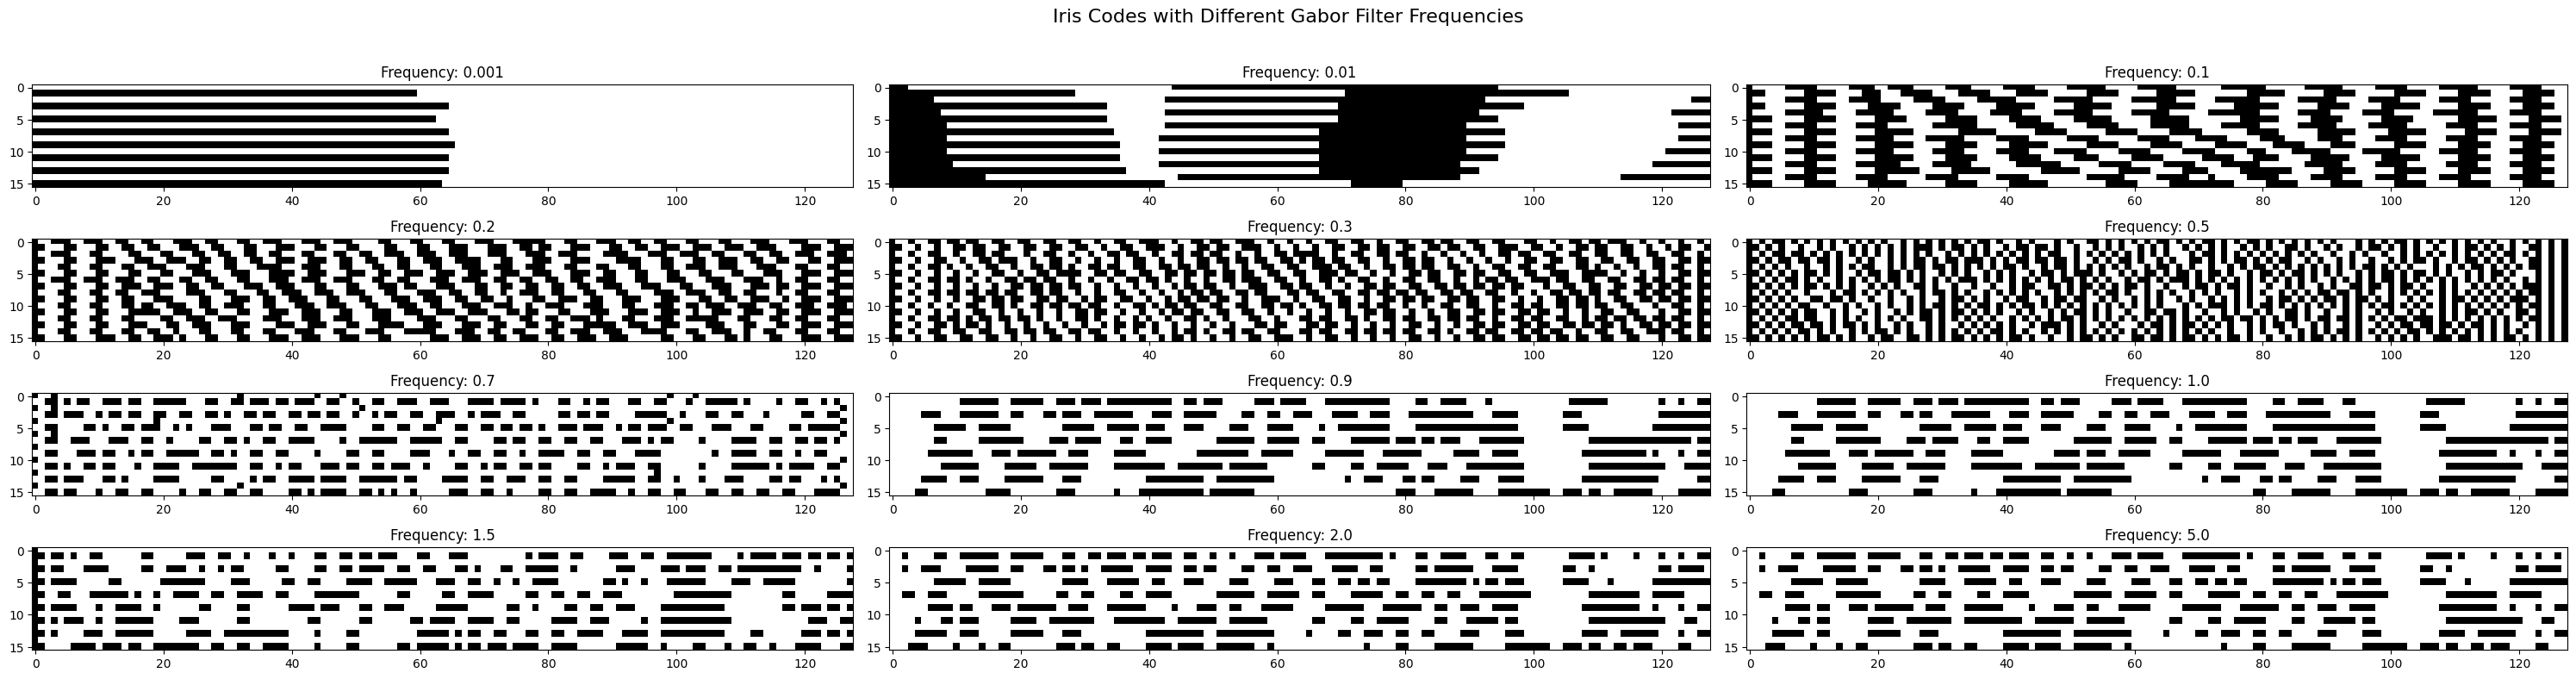

In [25]:
# Define a range of frequencies to try
frequencies = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 1.5, 2.0, 5.0]

fig, axes = plt.subplots(4, 3, figsize=(30, 8))
axes = axes.flatten()  # Flatten to make indexing easier

# Generate and plot iris codes for each frequency
for i, freq in enumerate(frequencies):
    # Generate iris code with current frequency
    iris_code = image_to_iris_code_2(sample_image, gabor_frequency=freq)
    
    # Plot on the corresponding subplot
    ax = axes[i]
    im = ax.imshow(iris_code, cmap="gray")
    ax.set_title(f"Frequency: {freq}")

# Adjust layout and add overall title
plt.tight_layout()
fig.suptitle("Iris Codes with Different Gabor Filter Frequencies", fontsize=16)
plt.subplots_adjust(top=0.9)  # Make room for the suptitle

# Show the plot
plt.show()

## Effect on seperation between people

In [10]:
iris_grouped = {}
filenames = []

for filename in os.listdir(extracted_irises_dir+"/left"):
    name_split = filename.replace(".png", "").split("-")
    iris_id = name_split[0]
    if iris_grouped.get(iris_id) is None:
        iris_grouped[iris_id] = []
    if filename.endswith(".png"):
        iris_grouped[iris_id].append(filename)
        filenames.append(filename)

print(iris_grouped)
print(f"Number of iris groups: {len(iris_grouped)}")

{'1': ['1-1.png', '1-2.png', '1-3.png', '1-4.png', '1-5.png'], '10': ['10-1.png', '10-2.png', '10-3.png', '10-4.png', '10-5.png'], '11': ['11-1.png', '11-2.png', '11-3.png', '11-4.png', '11-5.png'], '12': ['12-1.png', '12-2.png', '12-3.png', '12-4.png', '12-5.png'], '13': ['13-1.png', '13-2.png', '13-3.png', '13-4.png', '13-5.png'], '14': ['14-1.png', '14-2.png', '14-3.png', '14-4.png', '14-5.png'], '15': ['15-1.png', '15-2.png', '15-3.png', '15-4.png', '15-5.png'], '16': ['16-1.png', '16-2.png', '16-3.png', '16-4.png', '16-5.png'], '17': ['17-1.png', '17-2.png', '17-3.png', '17-4.png', '17-5.png'], '18': ['18-1.png', '18-2.png', '18-3.png', '18-4.png', '18-5.png'], '19': ['19-1.png', '19-2.png', '19-3.png', '19-4.png', '19-5.png'], '2': ['2-1.png', '2-2.png', '2-3.png', '2-4.png', '2-5.png'], '20': ['20-1.png', '20-2.png', '20-3.png', '20-4.png', '20-5.png'], '21': ['21-1.png', '21-2.png', '21-3.png', '21-4.png', '21-5.png'], '22': ['22-1.png', '22-2.png', '22-3.png', '22-4.png', '22-

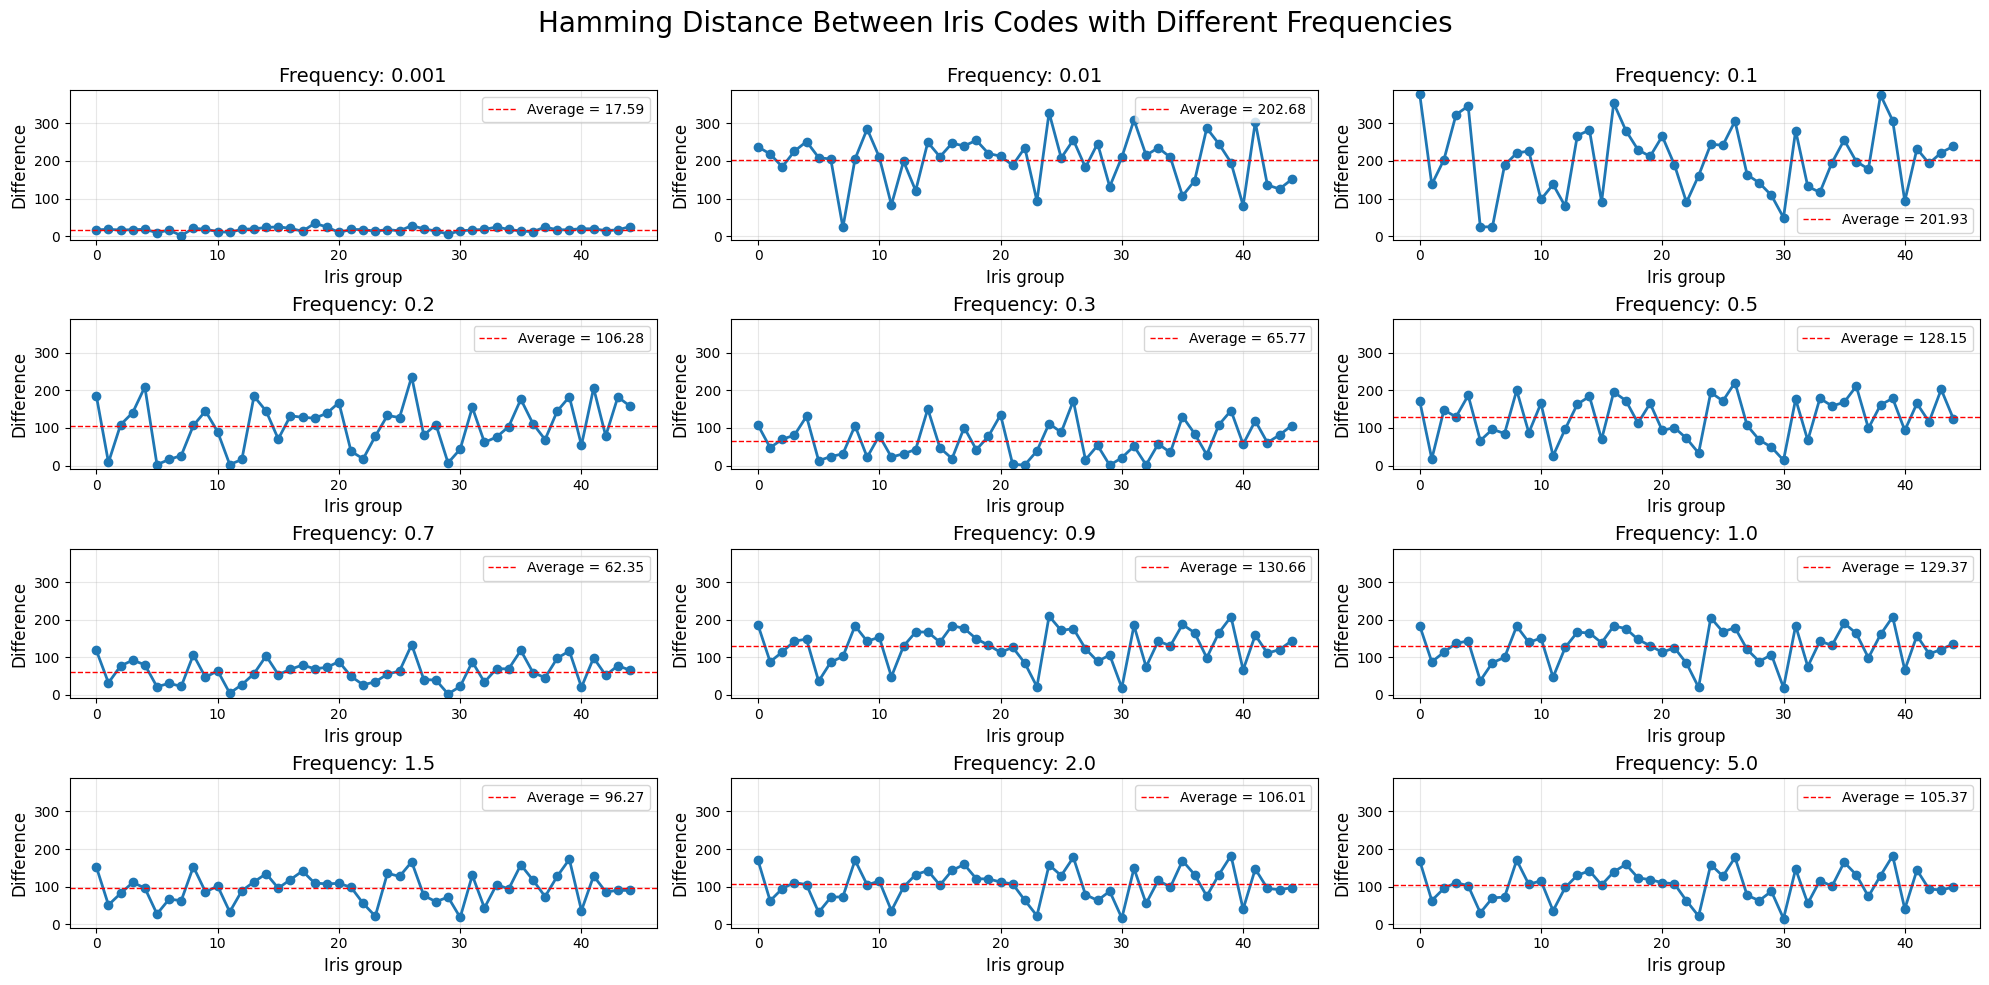

In [26]:
fig, axes = plt.subplots(4, 3, figsize=(20, 10))
axes = axes.flatten()  # Flatten to make indexing easier

all_differences = []

for i, freq in enumerate(frequencies):
    iris_codes = {}
    gabor_frequency = freq
    for filename in filenames:
        iris_code = image_to_iris_code_2(imread(os.path.join(extracted_irises_dir, "left", filename))[:, :, 0], 
                                         gabor_frequency=gabor_frequency)
        iris_codes[filename] = iris_code
    
    differences = []
    for key in iris_grouped.keys():
        same_group = []
        differnet_group = []
        for key2 in iris_grouped.keys():
            if key != key2:
                differnet_group += iris_grouped[key2]
            else:
                same_group += iris_grouped[key2]
        
        reference_code = iris_codes[same_group[0]]
        same_group.pop(0)
        
        average_distance_in_group = 0
        for element in same_group:
            hd = int((reference_code != iris_codes[element]).sum())
            average_distance_in_group += hd
        average_distance_in_group /= len(same_group) if same_group else 1
        
        average_distance_in_different_group = 0
        sample_different = differnet_group
        group_len = 0
        for element in sample_different:
            hd = int((reference_code != iris_codes[element]).sum())
            average_distance_in_different_group += hd
            group_len += 1
        if group_len > 0:
            average_distance_in_different_group /= group_len
        # average_distance_in_different_group /= len(sample_different) if sample_different else 1
        
        differences.append(abs(average_distance_in_different_group - average_distance_in_group))
    
    all_differences.extend(differences)
    
    ax = axes[i]
    ax.plot(differences, marker='o', linewidth=2)
    ax.set_title(f"Frequency: {freq}", fontsize=14)
    
    avg = np.mean(differences)
    ax.axhline(y=avg, color='red', linestyle='--', linewidth=1, 
               label=f'Average = {avg:.2f}')
    
    ax.set_xlabel("Iris group", fontsize=12)
    ax.set_ylabel("Difference", fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

y_min = min(all_differences) - 10
y_max = max(all_differences) + 10
for ax in axes:
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
fig.suptitle("Hamming Distance Between Iris Codes with Different Frequencies", fontsize=20)
plt.subplots_adjust(top=0.9)  # Make room for the suptitle
plt.show()

Based on the test, the best frequency is 0.5, so that's the frequency we'll use from now on

In [80]:
best_gabor_frequency = 0.1
# best_gabor_frequency = 0.3

# DEMO

## Helpers

In [81]:
def compare_codes(iris_code1, iris_code2):
    """
    Compare two iris codes and return the Hamming distance.
    """
    # plot
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(iris_code1, cmap="gray")
    axes[0].set_title("Iris Code 1")
    
    axes[1].imshow(iris_code2, cmap="gray")
    axes[1].set_title("Iris Code 2")

    axes[2].imshow(iris_code1 != iris_code2, cmap="gray")
    axes[2].set_title("Difference")

    hamming_distance = int((iris_code1 != iris_code2).sum())
    print(f"Hamming distance: {hamming_distance}. Total bits: {iris_code1.size}. Percentage: {hamming_distance / iris_code1.size:.2%}") 
    return hamming_distance

## Same person different eyes

Hamming distance: 750. Total bits: 2048. Percentage: 36.62%


750

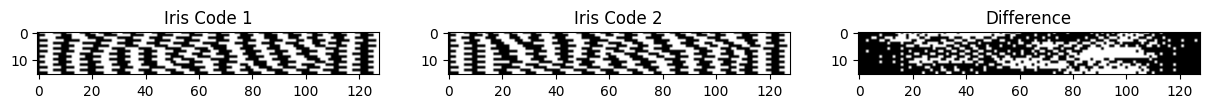

In [82]:
person_1 = iris_grouped["44"]
first_image = person_1[0]
second_image = person_1[0]

first_image_code = image_to_iris_code_2(imread(os.path.join(extracted_irises_dir, "left", first_image))[:, :, 0], gabor_frequency=best_gabor_frequency)
second_image_code = image_to_iris_code_2(imread(os.path.join(extracted_irises_dir, "right", second_image))[:, :, 0], gabor_frequency=best_gabor_frequency)

compare_codes(first_image_code, second_image_code)

## Same person same eye

Hamming distance: 292. Total bits: 2048. Percentage: 14.26%


292

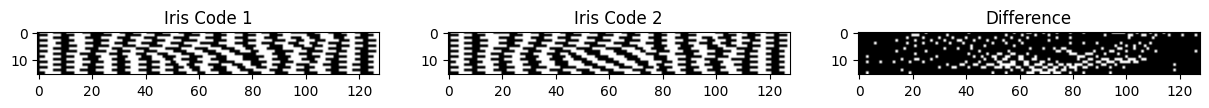

In [83]:
person_1 = iris_grouped["44"]
first_image = person_1[1]
second_image = person_1[2]

first_image_code = image_to_iris_code_2(imread(os.path.join(extracted_irises_dir, "left", first_image))[:, :, 0], gabor_frequency=best_gabor_frequency)
second_image_code = image_to_iris_code_2(imread(os.path.join(extracted_irises_dir, "left", second_image))[:, :, 0], gabor_frequency=best_gabor_frequency)

compare_codes(first_image_code, second_image_code)

## Different people

Hamming distance: 889. Total bits: 2048. Percentage: 43.41%


889

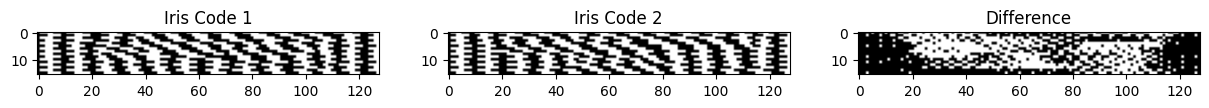

In [84]:
first_image = iris_grouped["14"][0]
second_image = iris_grouped["25"][0]

first_image_code = image_to_iris_code_2(imread(os.path.join(extracted_irises_dir, "left", first_image))[:, :, 0], gabor_frequency=best_gabor_frequency)
second_image_code = image_to_iris_code_2(imread(os.path.join(extracted_irises_dir, "left", second_image))[:, :, 0], gabor_frequency=best_gabor_frequency)

compare_codes(first_image_code, second_image_code)

## Entire process demonstrated

In [120]:
def cropper_and_rescaler(bands, number_of_bands = 8):
    bands = []
    for i in range(number_of_bands):
        start_row = i * band_height
        end_row = (
            (i + 1) * band_height
            if i != number_of_bands - 1
            else cropped_image.shape[0]
        )
        band = cropped_image[start_row:end_row, :]
        bands.append(band)
        # print(band.shape)

    bands_specifications = {
        # Bands 0-3: Top cutout 130, no bottom cutout
        **{
            str(i): {"top_cutout_width": 130, "bottom_cutout_width": 0}
            for i in range(number_of_bands // 2)
        },
        # Bands 4-5: Top cutout 322, bottom cutout 320
        **{
            str(i): {"top_cutout_width": 322, "bottom_cutout_width": 320}
            for i in range(number_of_bands // 2, number_of_bands // 2 * 3 // 4)
        },
        # Bands 6-7: Top cutout 386, bottom cutout 384
        **{
            str(i): {"top_cutout_width": 386, "bottom_cutout_width": 384}
            for i in range(number_of_bands // 2 * 3 // 4, number_of_bands)
        },
    }

    cropped_bands = []

    for i in range(8):
        top_cutout_width = bands_specifications[str(i)]["top_cutout_width"]
        bottom_cutout_width = bands_specifications[str(i)]["bottom_cutout_width"]

        band = copy.deepcopy(bands[i])

        top_band = copy.deepcopy(band)[:, band.shape[1] // 2 :]
        bottom_band = band[:, : band.shape[1] // 2].copy()

        print(
            f"Original shapes - band: {band.shape}, top_band: {top_band.shape}, bottom_band: {bottom_band.shape}"
        )

        top_center = top_band.shape[1] // 2
        bottom_center = bottom_band.shape[1] // 2

        if top_cutout_width > 0:
            top_start = top_center - top_cutout_width // 2
            top_end = top_center + top_cutout_width // 2
            top_start = max(0, top_start)
            top_end = min(top_band.shape[1], top_end)
            top_band_cropped = np.delete(top_band, np.s_[top_start:top_end], axis=1)
        else:
            top_band_cropped = top_band

        if bottom_cutout_width > 0:
            bottom_start = bottom_center - bottom_cutout_width // 2
            bottom_end = bottom_center + bottom_cutout_width // 2
            bottom_start = max(0, bottom_start)
            bottom_end = min(bottom_band.shape[1], bottom_end)
            bottom_band_cropped = np.delete(
                bottom_band, np.s_[bottom_start:bottom_end], axis=1
            )
        else:
            bottom_band_cropped = bottom_band

        # print(
        #     f"Cropped shapes - top_band: {top_band_cropped.shape}, bottom_band: {bottom_band_cropped.shape}",
        #     end=" ",
        # )
        combined_band = np.concatenate((bottom_band_cropped, top_band_cropped), axis=1)
        # print(f"Combined band shape: {combined_band.shape}")
        cropped_bands.append(combined_band.copy())

    cropped_bands_rescaled = np.stack(
        [downsample_to_128(b) for b in cropped_bands], axis=0
    )
    return cropped_bands_rescaled

aaa = cropper_and_rescaler(cropped_image, number_of_bands=8)


TypeError: slice indices must be integers or None or have an __index__ method

In [141]:
def get_cropped_bands_rescaled(
    input_image,
    plot=False,
    number_of_bands=8,
    plot_iris_code=False,
    gabor_frequency=0.25,
):
    image_temp = copy.deepcopy(input_image)
    rows_to_remove = image_temp.shape[0] - 440
    cropped_image = image_temp[rows_to_remove:, :]

    band_height = cropped_image.shape[0] // number_of_bands
    bands = []
    for i in range(number_of_bands):
        start_row = i * band_height
        end_row = (
            (i + 1) * band_height
            if i != number_of_bands - 1
            else cropped_image.shape[0]
        )
        band = cropped_image[start_row:end_row, :]
        bands.append(band)
        # print(band.shape)

    bands_specifications = {
        **{  # Bands 0-3: Top cutout 130, no bottom cutout
            str(i): {"top_cutout_width": 130, "bottom_cutout_width": 0}
            for i in range(number_of_bands // 2)
        },
        **{  # Bands 4-5: Top cutout 322, bottom cutout 320
            str(i): {"top_cutout_width": 322, "bottom_cutout_width": 320}
            for i in range(number_of_bands // 2, number_of_bands // 2 * 3 // 4)
        },
        **{  # Bands 6-7: Top cutout 386, bottom cutout 384
            str(i): {"top_cutout_width": 386, "bottom_cutout_width": 384}
            for i in range(number_of_bands // 2 * 3 // 4, number_of_bands)
        },
    }

    cropped_bands = []

    for i in range(8):
        top_cutout_width = bands_specifications[str(i)]["top_cutout_width"]
        bottom_cutout_width = bands_specifications[str(i)]["bottom_cutout_width"]

        band = copy.deepcopy(bands[i])

        top_band = copy.deepcopy(band)[:, band.shape[1] // 2 :]
        bottom_band = band[:, : band.shape[1] // 2].copy()

        # print(
        #     f"Original shapes - band: {band.shape}, top_band: {top_band.shape}, bottom_band: {bottom_band.shape}"
        # )

        top_center = top_band.shape[1] // 2
        bottom_center = bottom_band.shape[1] // 2

        if top_cutout_width > 0:
            top_start = top_center - top_cutout_width // 2
            top_end = top_center + top_cutout_width // 2
            top_start = max(0, top_start)
            top_end = min(top_band.shape[1], top_end)
            top_band_cropped = np.delete(top_band, np.s_[top_start:top_end], axis=1)
        else:
            top_band_cropped = top_band

        if bottom_cutout_width > 0:
            bottom_start = bottom_center - bottom_cutout_width // 2
            bottom_end = bottom_center + bottom_cutout_width // 2
            bottom_start = max(0, bottom_start)
            bottom_end = min(bottom_band.shape[1], bottom_end)
            bottom_band_cropped = np.delete(
                bottom_band, np.s_[bottom_start:bottom_end], axis=1
            )
        else:
            bottom_band_cropped = bottom_band

        combined_band = np.concatenate((bottom_band_cropped, top_band_cropped), axis=1)
        cropped_bands.append(combined_band.copy())

    cropped_bands_rescaled = np.stack(
        [downsample_to_128(b) for b in cropped_bands], axis=0
    )
    return cropped_bands_rescaled

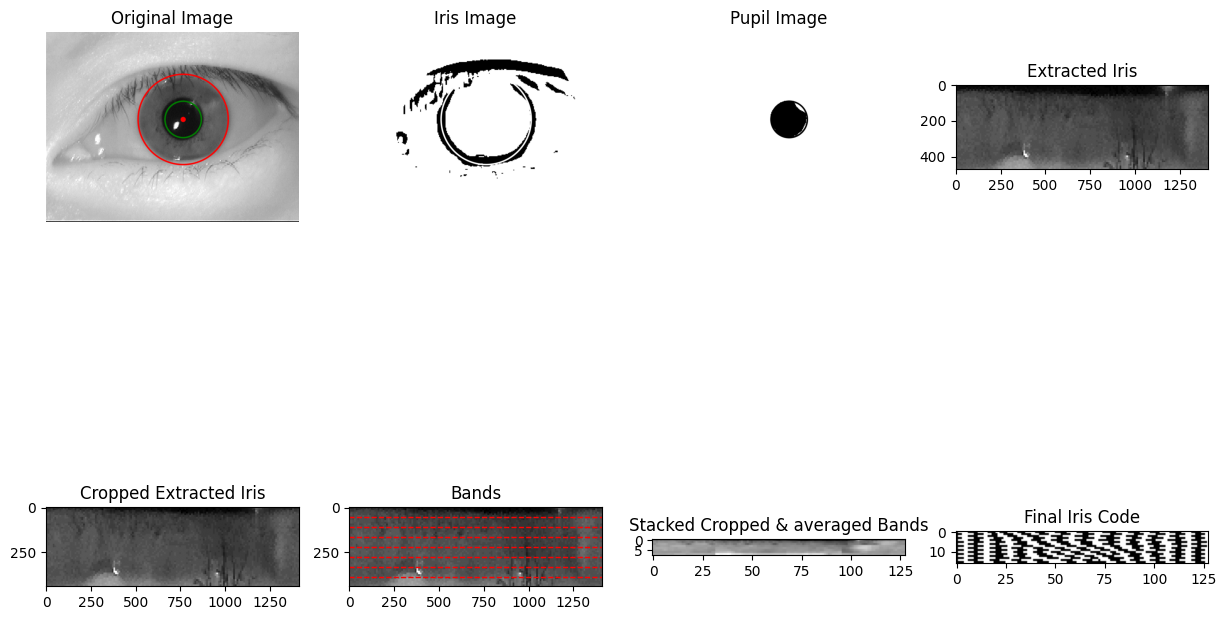

In [152]:
original_image = imread(os.path.join(base_dirs['images'], "left", "38-1.png"))
iris_image = imread(os.path.join(base_dirs['irises'], "left", "38-1.png"))[:, :, 0]
pupil_image = imread(os.path.join(base_dirs["pupils"], "left", "38-1.png"))[:, :, 0]

sample_image_path = os.path.join(base_dirs["extracted_irises"], "left", "38-1.png")

extracted_iris = imread(sample_image_path)[:, :, 0]

rows_to_remove = extracted_iris.shape[0] - 440
cropped_extracted_iris = extracted_iris[rows_to_remove:, :]

bands = np.zeros((extracted_iris.shape[0], extracted_iris.shape[1], 8), dtype=np.uint8)

stacked_cropped_bands = np.vstack(get_cropped_bands_rescaled(
    cropped_image,
    plot=False,
    number_of_bands=8,
    plot_iris_code=False,
    gabor_frequency=0.25,
))

final_code = image_to_iris_code_2(imread(sample_image_path)[:, :, 0], gabor_frequency=best_gabor_frequency)

# bands_cropped = cropper_and_rescaler(bands, number_of_bands=8)

fig, axes = plt.subplots(2, 4, figsize=(15, 10))

axes[0, 0].imshow(original_image, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(iris_image, cmap="gray")  
axes[0, 1].set_title("Iris Image")
axes[0, 1].axis("off")

axes[0, 2].imshow(pupil_image, cmap="gray")
axes[0, 2].set_title("Pupil Image")
axes[0, 2].axis("off")

axes[0, 3].imshow(extracted_iris, cmap="gray")
axes[0, 3].set_title("Extracted Iris")

axes[1, 0].imshow(cropped_extracted_iris, cmap="gray")
axes[1, 0].set_title("Cropped Extracted Iris")

axes[1, 1].imshow(cropped_extracted_iris, cmap="gray")
axes[1, 1].set_title("Bands")

axes[1, 2].imshow(stacked_cropped_bands, cmap="gray")
axes[1, 2].set_title("Stacked Cropped & averaged Bands")

axes[1, 3].imshow(final_code, cmap="gray")
axes[1, 3].set_title("Final Iris Code")


ax_band = axes[1, 1]
ax_band.imshow(cropped_extracted_iris, cmap="gray")
ax_band.set_title("Bands")
total_rows = cropped_extracted_iris.shape[0]
band_height = total_rows / 8

for i in range(1, 8):
    y = i * band_height
    ax_band.axhline(y=y, color="red", linestyle="--", linewidth=1)


# OTHER

In [85]:
print(

_IncompleteInputError: incomplete input (149104261.py, line 1)

1
Hamming distance: 702. Total bits: 2048. Percentage: 34.28%
2
Hamming distance: 904. Total bits: 2048. Percentage: 44.14%
3
Hamming distance: 806. Total bits: 2048. Percentage: 39.36%
4
5
Hamming distance: 766. Total bits: 2048. Percentage: 37.40%
6
Hamming distance: 823. Total bits: 2048. Percentage: 40.19%
7
Hamming distance: 796. Total bits: 2048. Percentage: 38.87%
8
Hamming distance: 836. Total bits: 2048. Percentage: 40.82%
9
Hamming distance: 817. Total bits: 2048. Percentage: 39.89%
10
Hamming distance: 773. Total bits: 2048. Percentage: 37.74%
11
Hamming distance: 718. Total bits: 2048. Percentage: 35.06%
12
Hamming distance: 692. Total bits: 2048. Percentage: 33.79%
13
Hamming distance: 980. Total bits: 2048. Percentage: 47.85%
14
Hamming distance: 785. Total bits: 2048. Percentage: 38.33%
15
Hamming distance: 769. Total bits: 2048. Percentage: 37.55%
16
Hamming distance: 754. Total bits: 2048. Percentage: 36.82%
17
Hamming distance: 794. Total bits: 2048. Percentage: 38.77

C:\Users\admin\AppData\Local\Temp\ipykernel_36612\1457001031.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))


Hamming distance: 790. Total bits: 2048. Percentage: 38.57%
26
Hamming distance: 866. Total bits: 2048. Percentage: 42.29%
27
Hamming distance: 898. Total bits: 2048. Percentage: 43.85%
28
Hamming distance: 685. Total bits: 2048. Percentage: 33.45%
29
Hamming distance: 773. Total bits: 2048. Percentage: 37.74%
30
Hamming distance: 903. Total bits: 2048. Percentage: 44.09%
31
Hamming distance: 718. Total bits: 2048. Percentage: 35.06%
32
Hamming distance: 812. Total bits: 2048. Percentage: 39.65%
33
Hamming distance: 680. Total bits: 2048. Percentage: 33.20%
34
Hamming distance: 922. Total bits: 2048. Percentage: 45.02%
35
Hamming distance: 868. Total bits: 2048. Percentage: 42.38%
36
Hamming distance: 763. Total bits: 2048. Percentage: 37.26%
37
Hamming distance: 968. Total bits: 2048. Percentage: 47.27%
38
Hamming distance: 854. Total bits: 2048. Percentage: 41.70%
39
Hamming distance: 837. Total bits: 2048. Percentage: 40.87%
40
Hamming distance: 737. Total bits: 2048. Percentage: 35

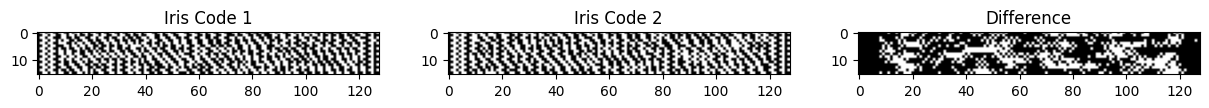

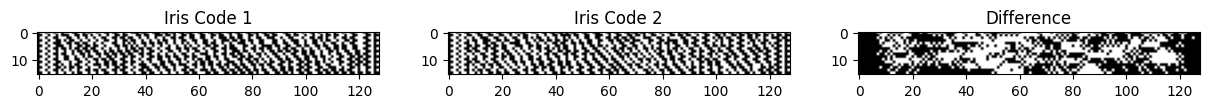

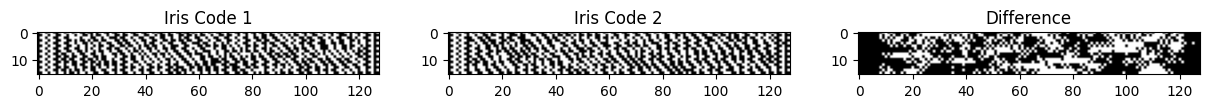

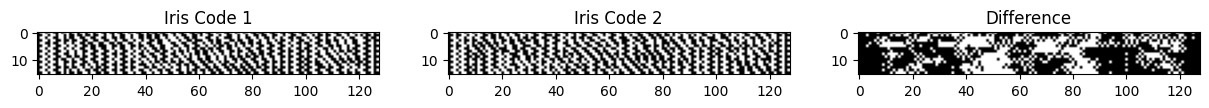

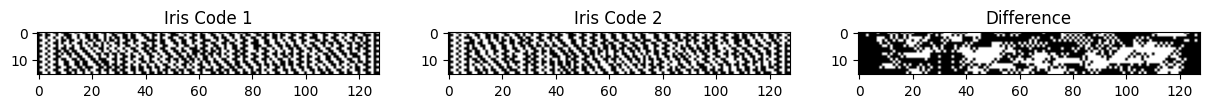

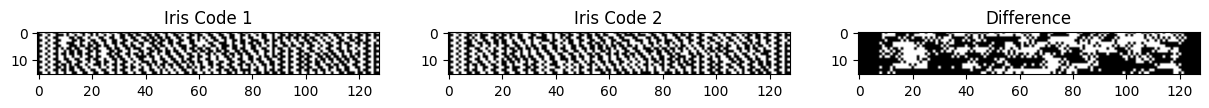

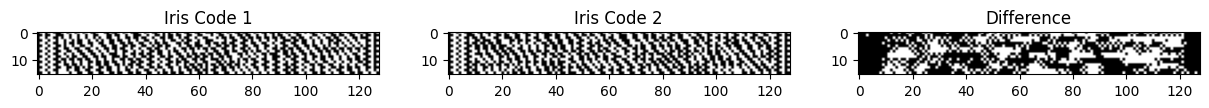

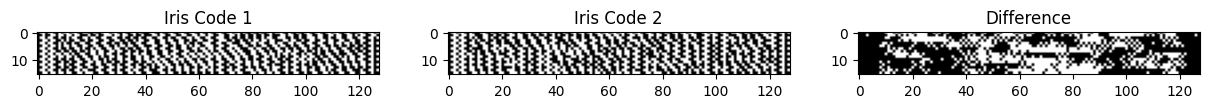

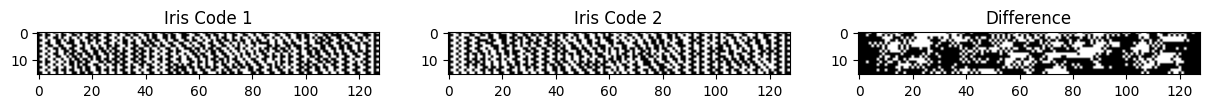

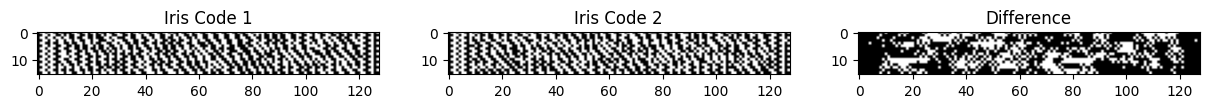

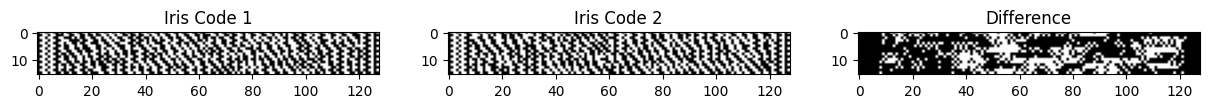

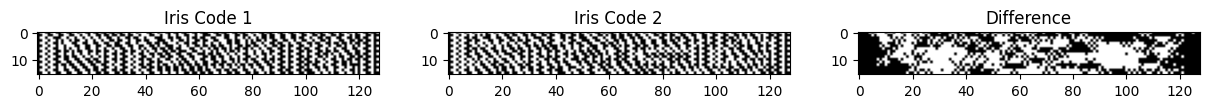

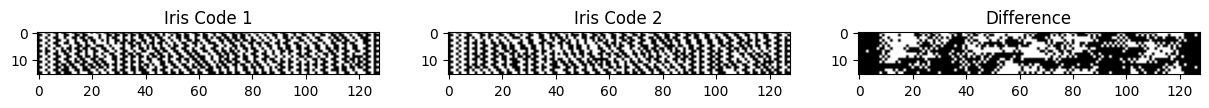

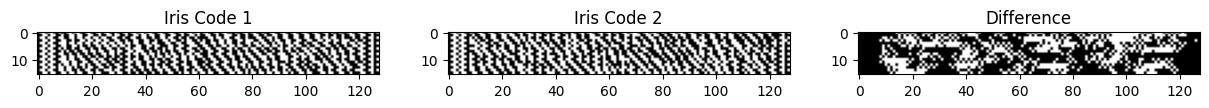

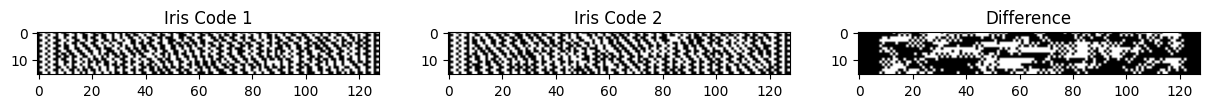

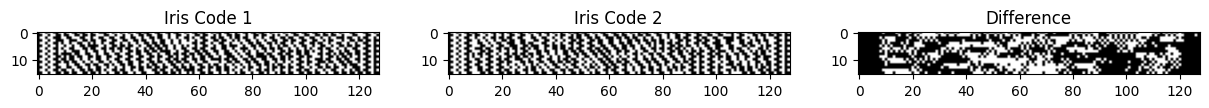

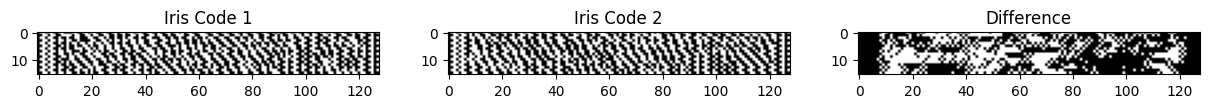

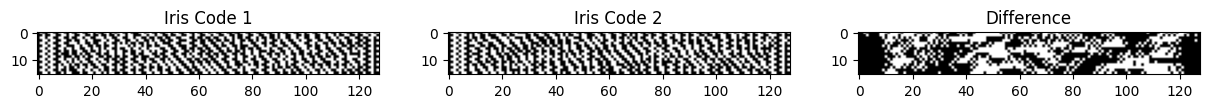

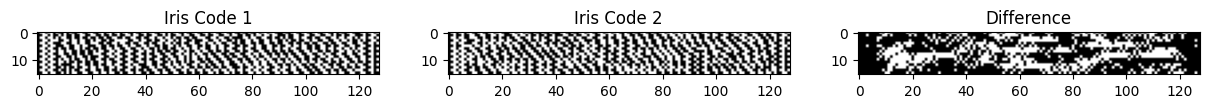

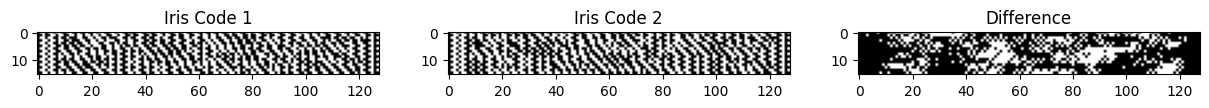

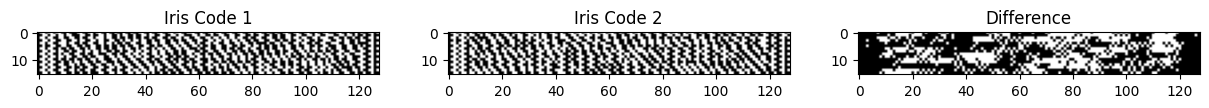

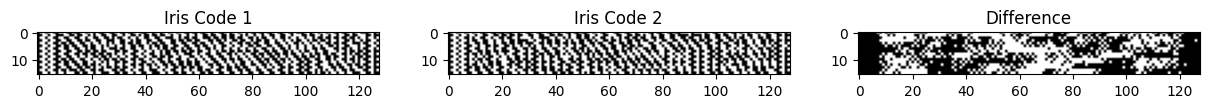

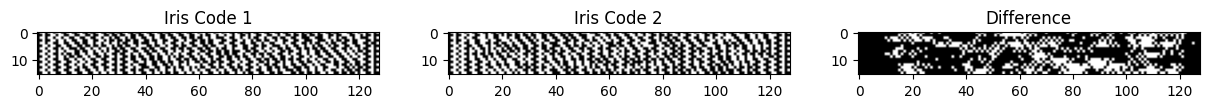

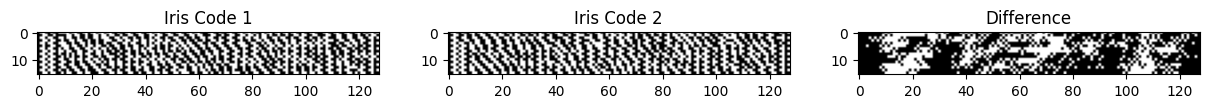

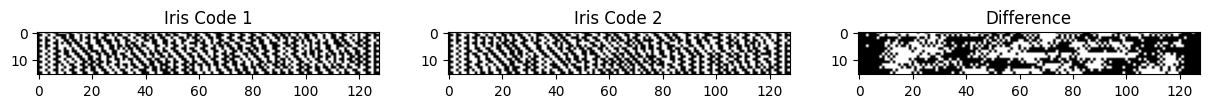

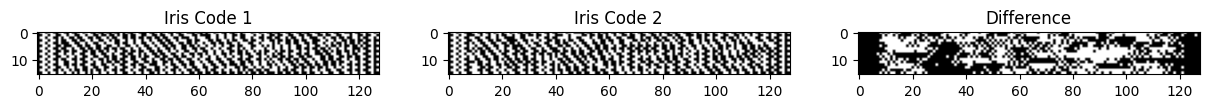

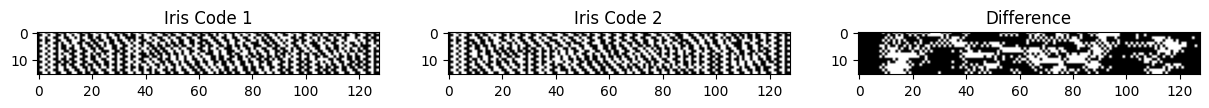

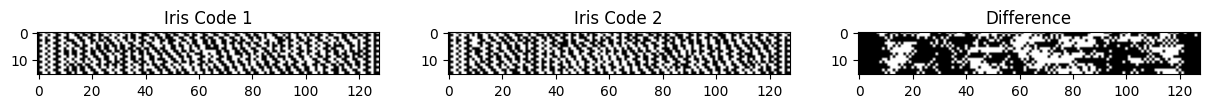

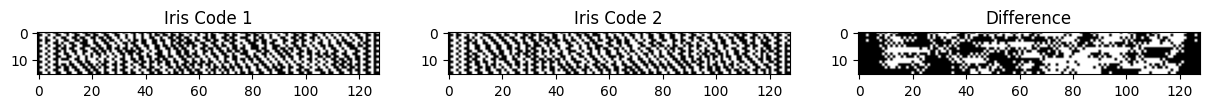

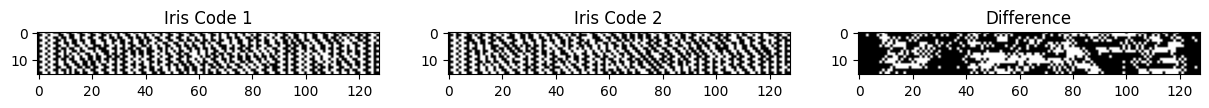

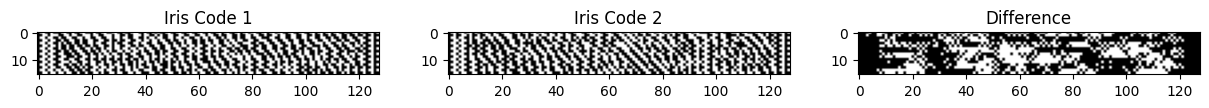

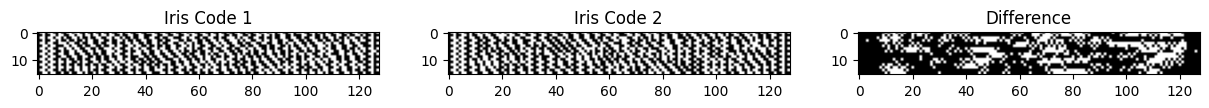

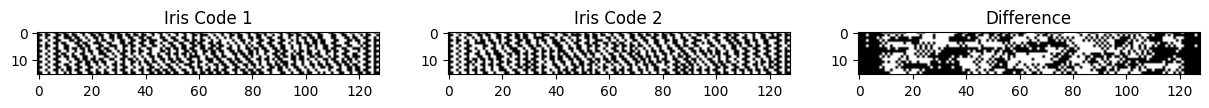

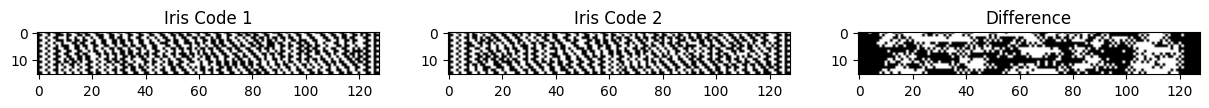

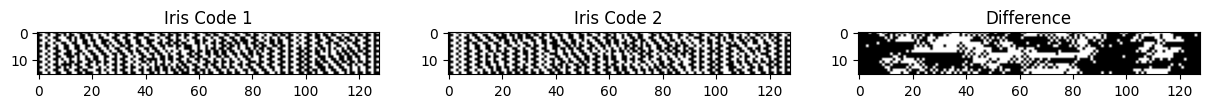

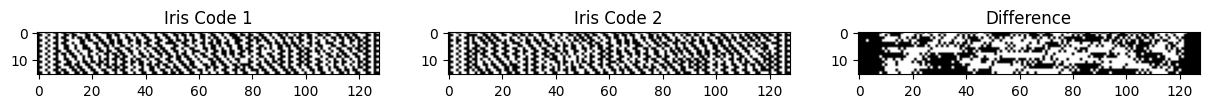

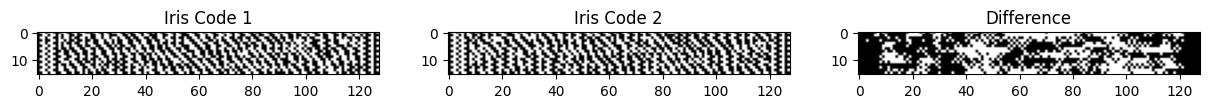

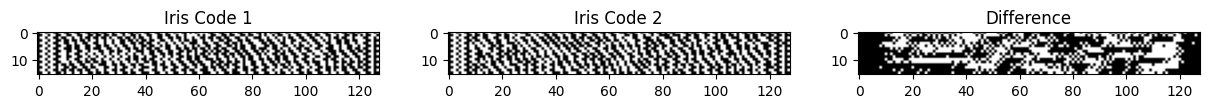

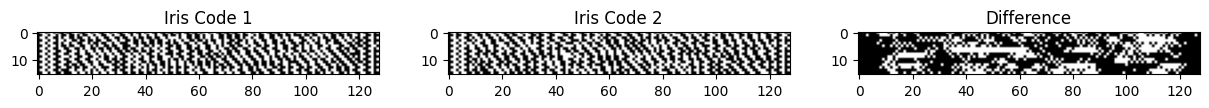

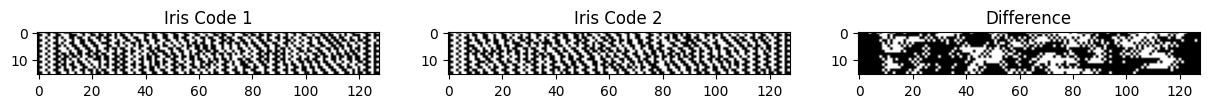

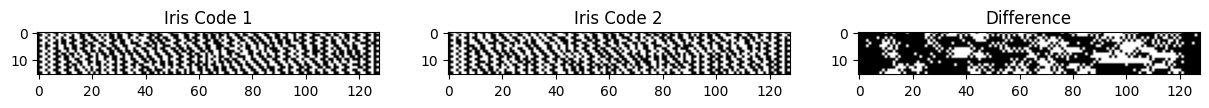

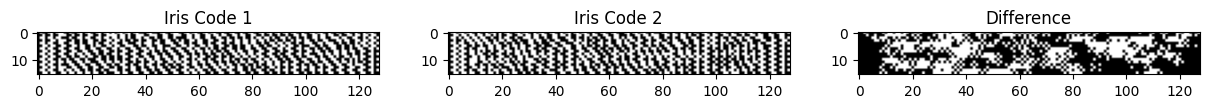

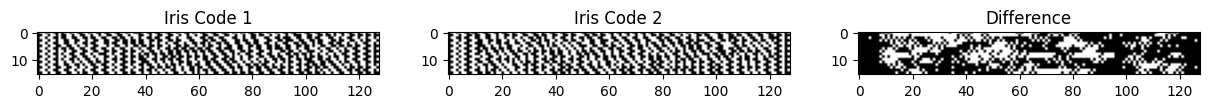

In [ ]:
for i in range(1, 45):
    print(i)
    if i == 4:
        continue
    person_1 = iris_grouped[str(i)]
    first_image = person_1[1]
    second_image = person_1[2]

    first_image_code = image_to_iris_code_2(imread(os.path.join(extracted_irises_dir, "left", first_image))[:, :, 0], gabor_frequency=best_gabor_frequency)
    second_image_code = image_to_iris_code_2(imread(os.path.join(extracted_irises_dir, "left", second_image))[:, :, 0], gabor_frequency=best_gabor_frequency)

    compare_codes(first_image_code, second_image_code)

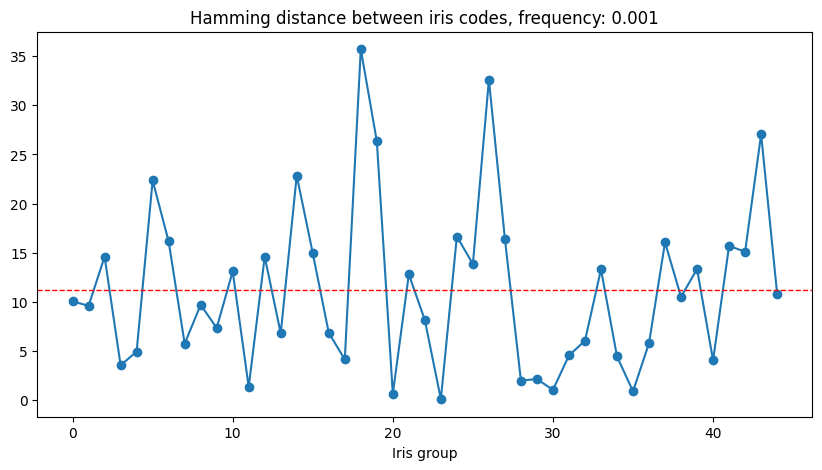

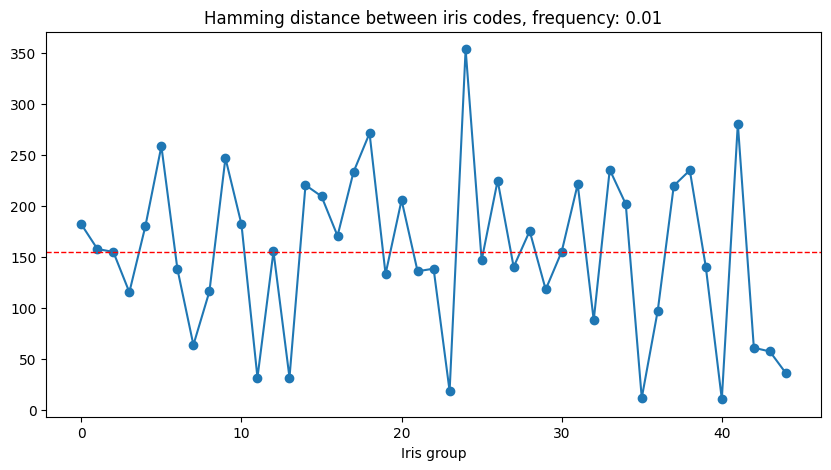

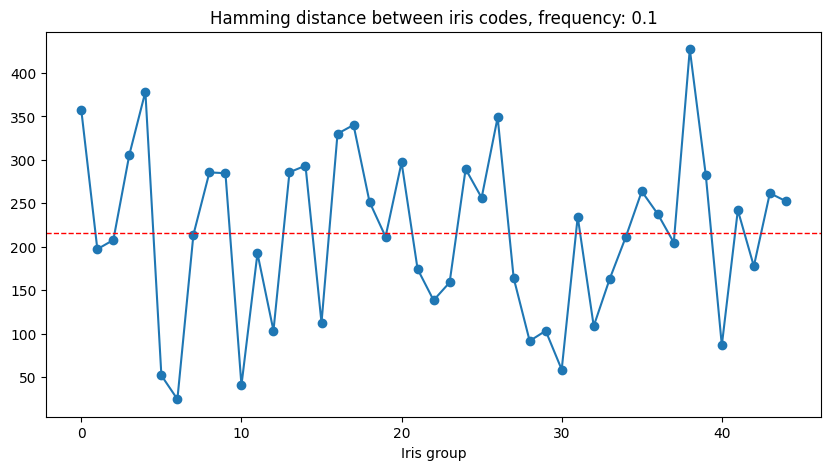

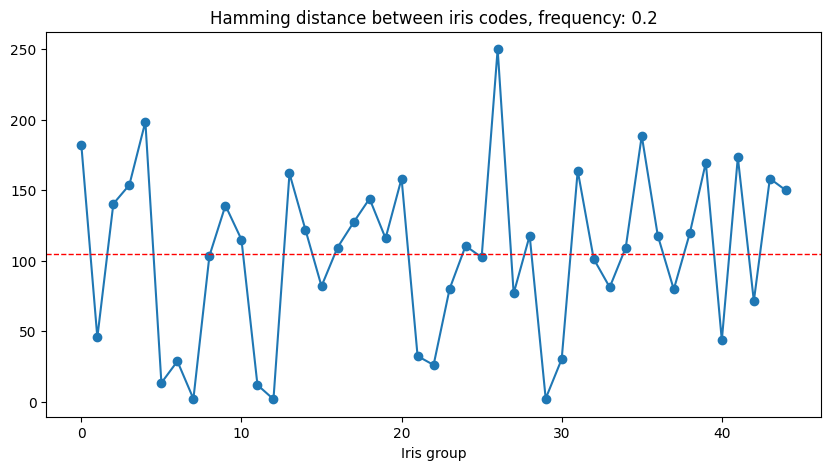

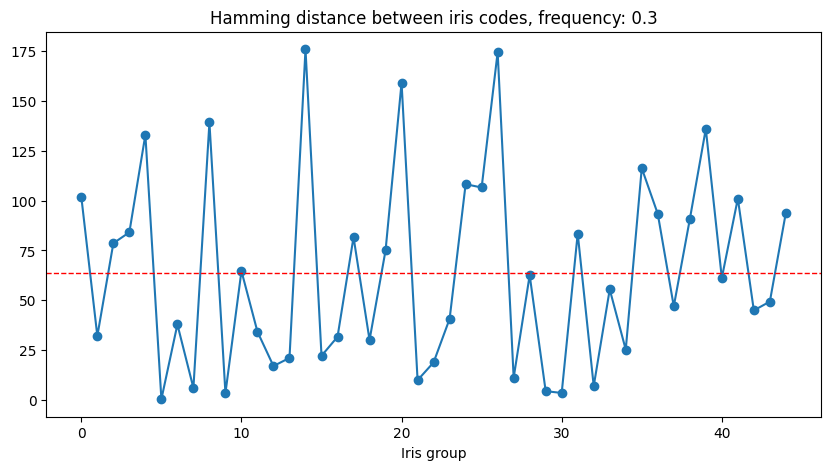

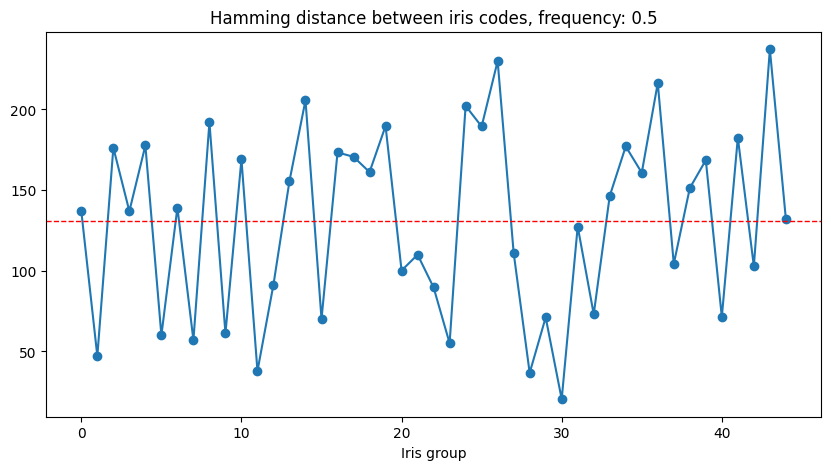

In [ ]:
for freq in frequencies:

    iris_codes = {}

    gabor_frequency = freq
    for filename in filenames:
        # print(filename)
        iris_code = image_to_iris_code_2(imread(os.path.join(extracted_irises_dir, "left", filename))[:, :, 0], gabor_frequency=gabor_frequency)
        iris_codes[filename] = iris_code


    # print(list(iris_grouped.keys()))
    differences = []
    for key in iris_grouped.keys():
        same_group = []
        differnet_group = []
        for key2 in iris_grouped.keys():
            if key != key2:
                differnet_group+=iris_grouped[key2]
            else:
                same_group+=iris_grouped[key2]

        reference_code = iris_codes[same_group[0]]
        same_group.pop(0)

        average_distance_in_group = 0
        for element in same_group:
            hd = int((reference_code != iris_codes[element]).sum())
            average_distance_in_group += hd
        average_distance_in_group /= len(same_group)

        # print(f"Average distance in group {key}: {average_distance_in_group}")

        average_distance_in_different_group = 0
        for element in differnet_group[:10]:
            hd = int((reference_code != iris_codes[element]).sum())
            average_distance_in_different_group += hd
        average_distance_in_different_group /= len(differnet_group[:10])
        differences.append(abs(average_distance_in_different_group - average_distance_in_group))
        

    # print(differences)
    plt.figure(figsize=(10, 5))
    plt.plot(differences, marker='o')
    plt.title("Hamming distance between iris codes, frequency: "+str(freq))
    avg = np.mean(differences)
    plt.axhline(y=avg,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Average = {avg:.2f}')
    plt.xlabel("Iris group")

# Comparisons

In [ ]:
def compare_iris_codes(code1: np.ndarray,
                       code2: np.ndarray,
                       title1: str = "Iris code 1",
                       title2: str = "Iris code 2",
                       title3: str = "Differences") -> float:
    """
    Compare two binary iris‐code arrays of the same shape.

    Parameters
    ----------
    code1, code2 : np.ndarray
        Arrays of shape (n_rows, n_cols) with dtype uint8 or bool.
    title1, title2, title3 : str
        Titles for the three subplots.

    Returns
    -------
    hamming_distance : float
        The total number of differing bits.
    """
    if code1.shape != code2.shape:
        raise ValueError(f"Shape mismatch: {code1.shape} vs {code2.shape}")

    # Compute difference mask (True where bits differ)
    diff_mask = (code1 != code2)

    # Hamming distance = total number of differing bits
    hamming_distance = int(diff_mask.sum())

    # Set up figure
    fig, axes = plt.subplots(1, 3, figsize=(12, 4),
                             gridspec_kw={'wspace': 0.3})
    
    for ax, mat, title in zip(axes,
                              (code1, code2, diff_mask),
                              (title1, title2, f"{title3}\nHD={hamming_distance}")):
        ax.imshow(mat, cmap='gray', aspect='auto', interpolation='nearest')
        ax.set_title(title, fontsize=10, pad=4)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    return hamming_distance

In [ ]:
def plot_group_hamming_distances(iris_codes, filenames, group_size=5):
    """
    Splits iris_codes into consecutive groups of `group_size` and, for each group,
    plots a bar‐chart of the Hamming distance between the first code in the group
    and each member of the same group (including itself).
    
    Parameters
    ----------
    iris_codes : List[np.ndarray]
        List of 2D binary arrays (n_rows×n_cols).
    filenames : List[str]
        Parallel list of filenames, for labeling.
    group_size : int
        How many codes per group.
    """
    n = len(iris_codes)
    n_groups = n // group_size

    fig, axes = plt.subplots(1, n_groups,
                             figsize=(4 * n_groups, 4),
                             sharey=True)
    if n_groups == 1:
        axes = [axes]

    for gi in range(n_groups):
        start = gi * group_size
        ref_code = iris_codes[start]
        ref_name = filenames[start]

        distances = []
        labels = []
        for j in range(start, start + group_size):
            # compute Hamming distance
            hd = int((ref_code != iris_codes[j]).sum())
            distances.append(hd)
            labels.append(os.path.splitext(filenames[j])[0])

        ax = axes[gi]
        ax.bar(range(group_size), distances)
        ax.set_xticks(range(group_size))
        ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
        ax.set_title(f"Group {gi+1}\n(ref: {ref_name})", fontsize=10)
        ax.set_ylabel("Hamming distance")
        ax.set_xlabel("Sample")

    plt.tight_layout()
    plt.show()

## Same Eye

In [ ]:
iris_grouped = {}
filenames = []

for filename in os.listdir(extracted_irises_dir+"/left"):
    name_split = filename.replace(".png", "").split("-")
    iris_id = name_split[0]
    if iris_grouped.get(iris_id) is None:
        iris_grouped[iris_id] = []
    if filename.endswith(".png"):
        iris_grouped[iris_id].append(filename)
        filenames.append(filename)
    # if filename.endswith(".png"):
    #     print(f"{filename}")
    #     print(filename.replace(".png", "").split("-"))

print(iris_grouped)
print(f"Number of iris groups: {len(iris_grouped)}")
        
        

{'1': ['1-1.png', '1-2.png', '1-3.png', '1-4.png', '1-5.png'], '10': ['10-1.png', '10-2.png', '10-3.png', '10-4.png', '10-5.png'], '11': ['11-1.png', '11-2.png', '11-3.png', '11-4.png', '11-5.png'], '12': ['12-1.png', '12-2.png', '12-3.png', '12-4.png', '12-5.png'], '13': ['13-1.png', '13-2.png', '13-3.png', '13-4.png', '13-5.png'], '14': ['14-1.png', '14-2.png', '14-3.png', '14-4.png', '14-5.png'], '15': ['15-1.png', '15-2.png', '15-3.png', '15-4.png', '15-5.png'], '16': ['16-1.png', '16-2.png', '16-3.png', '16-4.png', '16-5.png'], '17': ['17-1.png', '17-2.png', '17-3.png', '17-4.png', '17-5.png'], '18': ['18-1.png', '18-2.png', '18-3.png', '18-4.png', '18-5.png'], '19': ['19-1.png', '19-2.png', '19-3.png', '19-4.png', '19-5.png'], '2': ['2-1.png', '2-2.png', '2-3.png', '2-4.png', '2-5.png'], '20': ['20-1.png', '20-2.png', '20-3.png', '20-4.png', '20-5.png'], '21': ['21-1.png', '21-2.png', '21-3.png', '21-4.png', '21-5.png'], '22': ['22-1.png', '22-2.png', '22-3.png', '22-4.png', '22-

In [ ]:
import multiprocessing
from functools import partial

def process_image(image_data, filename, gabor_frequency):
    """Process a single image to generate its iris code"""
    # Process grayscale image
    iris_code = image_to_iris_code_2(image_data, gabor_frequency=gabor_frequency)
    return filename, iris_code

def generate_iris_codes_parallel(filenames, extracted_irises_dir, gabor_frequency=0.01, num_cores=None):
    """Generate iris codes using multiple CPU cores with pre-loaded images"""
    if num_cores is None:
        num_cores = multiprocessing.cpu_count()  # Use all available cores
    
    # Preload all images
    image_data = {}
    for filename in filenames:
        # Read image and extract grayscale channel
        image = imread(os.path.join(extracted_irises_dir, "left", filename))[:, :, 0]
        image_data[filename] = image
    
    # Prepare arguments for parallel processing
    args_list = [(image_data[filename], filename, gabor_frequency) for filename in filenames]
    
    # Create a pool of workers
    with multiprocessing.Pool(processes=num_cores) as pool:
        # Map the function to all image data and get results
        results = pool.starmap(process_image, args_list)
    
    # Convert results to dictionary
    iris_codes = dict(results)
    return iris_codes

# Usage:
gabor_frequency = 0.01
iris_codes = generate_iris_codes_parallel(
    filenames, 
    extracted_irises_dir,
    gabor_frequency=gabor_frequency, 
    num_cores=8  # Specify number of cores or remove to use all available
)

In [ ]:
# print(list(iris_grouped.keys()))
differences = []
for key in iris_grouped.keys():
    same_group = []
    differnet_group = []
    for key2 in iris_grouped.keys():
        if key != key2:
            differnet_group+=iris_grouped[key2]
        else:
            same_group+=iris_grouped[key2]

    reference_code = iris_codes[same_group[0]]
    same_group.pop(0)

    average_distance_in_group = 0
    for element in same_group:
        hd = int((reference_code != iris_codes[element]).sum())
        average_distance_in_group += hd
    average_distance_in_group /= len(same_group)

    # print(f"Average distance in group {key}: {average_distance_in_group}")

    average_distance_in_different_group = 0
    for element in differnet_group[:10]:
        hd = int((reference_code != iris_codes[element]).sum())
        average_distance_in_different_group += hd
    average_distance_in_different_group /= len(differnet_group[:10])

    # print(f"Average distance in different group {key}: {average_distance_in_different_group}")
    # print(f"difference: {average_distance_in_different_group - average_distance_in_group}")
    # print(f"Percentage of different group: {average_distance_in_different_group/average_distance_in_group}")
    differences.append(average_distance_in_different_group - average_distance_in_group)
    

# print(differences)
plt.figure(figsize=(10, 5))
plt.plot(differences, marker='o')
plt.title("Hamming distance between iris codes")

In [ ]:
for freq in np.arange(1/128, 0.2, 0.01):

    iris_codes = {}

    gabor_frequency = freq
    for filename in filenames:
        # print(filename)
        iris_code = image_to_iris_code_2(imread(os.path.join(extracted_irises_dir, "left", filename))[:, :, 0], gabor_frequency=gabor_frequency)
        iris_codes[filename] = iris_code


    # print(list(iris_grouped.keys()))
    differences = []
    for key in iris_grouped.keys():
        same_group = []
        differnet_group = []
        for key2 in iris_grouped.keys():
            if key != key2:
                differnet_group+=iris_grouped[key2]
            else:
                same_group+=iris_grouped[key2]

        reference_code = iris_codes[same_group[0]]
        same_group.pop(0)

        average_distance_in_group = 0
        for element in same_group:
            hd = int((reference_code != iris_codes[element]).sum())
            average_distance_in_group += hd
        average_distance_in_group /= len(same_group)

        # print(f"Average distance in group {key}: {average_distance_in_group}")

        average_distance_in_different_group = 0
        for element in differnet_group[:10]:
            hd = int((reference_code != iris_codes[element]).sum())
            average_distance_in_different_group += hd
        average_distance_in_different_group /= len(differnet_group[:10])

        # print(f"Average distance in different group {key}: {average_distance_in_different_group}")
        # print(f"difference: {average_distance_in_different_group - average_distance_in_group}")
        # print(f"Percentage of different group: {average_distance_in_different_group/average_distance_in_group}")
        differences.append(average_distance_in_different_group - average_distance_in_group)
        

    # print(differences)
    plt.figure(figsize=(10, 5))
    plt.plot(differences, marker='o')
    plt.title("Hamming distance between iris codes, frequency: "+str(freq))
    avg = np.mean(differences)
    plt.axhline(y=avg,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Average = {avg:.2f}')
    plt.xlabel("Iris group")

In [ ]:
best_freq = None
max_avg_difference = float('-inf')
all_avg_differences = []

for freq in np.arange(1/128, 0.2, 0.01):
    iris_codes = {}
    gabor_frequency = freq
    
    # Generate iris codes for all images
    for filename in filenames:
        iris_code = image_to_iris_code_2(imread(os.path.join(extracted_irises_dir, "left", filename))[:, :, 0], 
                                         gabor_frequency=gabor_frequency)
        iris_codes[filename] = iris_code
    
    # Calculate differences
    differences = []
    for key in iris_grouped.keys():
        same_group = iris_grouped[key].copy()  # Make a copy to avoid modifying original
        different_group = []
        
        for key2 in iris_grouped.keys():
            if key != key2:
                different_group += iris_grouped[key2]
        
        reference_code = iris_codes[same_group[0]]
        same_group.pop(0)
        
        # Calculate average distance within same group
        avg_distance_in_group = 0
        for element in same_group:
            hd = int((reference_code != iris_codes[element]).sum())
            avg_distance_in_group += hd
        avg_distance_in_group /= max(len(same_group), 1)  # Avoid division by zero
        
        # Calculate average distance to different groups
        avg_distance_different_group = 0
        sample_size = min(10, len(different_group))
        for element in different_group[:sample_size]:
            hd = int((reference_code != iris_codes[element]).sum())
            avg_distance_different_group += hd
        avg_distance_different_group /= sample_size
        
        # Calculate separation metric
        difference = avg_distance_different_group - avg_distance_in_group
        differences.append(difference)
    
    # Calculate average separation across all groups
    avg_difference = np.mean(differences)
    all_avg_differences.append((freq, avg_difference))
    
    # Update best frequency if this one is better
    if avg_difference > max_avg_difference:
        max_avg_difference = avg_difference
        best_freq = freq
    
    # Plot differences for this frequency
    plt.figure(figsize=(10, 5))
    plt.plot(differences, marker='o')
    plt.title(f"Hamming distance between iris codes, frequency: {freq:.4f}")
    plt.axhline(y=avg_difference, color='red', linestyle='--', linewidth=1, 
                label=f'Average = {avg_difference:.2f}')
    plt.xlabel("Iris group")
    plt.ylabel("Difference (between groups - within group)")
    plt.legend()
    plt.savefig(f"freq_{freq:.4f}.png")  # Optional: save plots
    plt.close()  # Close to avoid too many open figures

# Plot average differences vs frequency to see the trend
frequencies, avg_diffs = zip(*all_avg_differences)
plt.figure(figsize=(12, 6))
plt.plot(frequencies, avg_diffs, marker='o')
plt.title("Average separation vs frequency")
plt.xlabel("Gabor filter frequency")
plt.ylabel("Average separation")
plt.axvline(x=best_freq, color='green', linestyle='--', 
            label=f'Best frequency = {best_freq:.4f}')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best frequency: {best_freq:.4f} with average separation: {max_avg_difference:.2f}")

## Znalezienie gabor freq. eksperymentalnie

In [ ]:
iris_codes = []
filenames = []

start_index = 0
for filename in os.listdir(extracted_irises_dir+"/left")[start_index:start_index+10]:
    if filename.endswith(".png"):
        print(f"Processing: {filename}")
        image = imread(os.path.join(extracted_irises_dir, "left", filename))[:, :, 0]
        iris_code = image_to_iris_code_2(image, gabor_frequency=0.01, plot_iris_code=False)
        iris_codes.append(iris_code)
        filenames.append(filename)

# compare_iris_codes(iris_codes[0], iris_codes[1])


plot_group_hamming_distances(iris_codes, filenames, group_size=10)

In [ ]:
frequencies = np.linspace(0.005, 0.015, 20)   # 20 values from 0.01 to 2.0
n_samples   = 10                           # how many images per batch
start_index = 0                            # where to start in the dir
dir_left    = os.path.join(extracted_irises_dir, "left")

# pre‑grab exactly the filenames you’ll use
all_pngs = [f for f in os.listdir(dir_left) if f.endswith(".png")]
filenames = all_pngs[start_index : start_index + n_samples]

# ─── LOOP OVER FREQUENCIES ───────────────────────────────────────────────────
for freq in frequencies:
    iris_codes = []
    print(f"\n=== Computing iris codes at Gabor freq = {freq:.3f} ===")
    
    for fn in filenames:
        print("  •", fn)
        img = imread(os.path.join(dir_left, fn))[:, :, 0]
        code = image_to_iris_code_2(img,
                                    gabor_frequency=freq,
                                    plot_iris_code=False)
        iris_codes.append(code)
    
    # compute Hamming distances against the first code
    ref = iris_codes[0]
    dists = [ int((ref != c).sum()) for c in iris_codes ]
    
    # ─── PLOT ────────────────────────────────────────────────────────────────
    fig, ax = plt.subplots(figsize=(8, 4))
    indices = range(len(dists))
    labels  = [os.path.splitext(f)[0] for f in filenames]
    
    ax.bar(indices, dists)
    ax.set_xticks(indices)
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
    ax.set_ylabel("Hamming distance")
    ax.set_title(f"Gabor frequency = {freq:.3f}")
    plt.tight_layout()
    plt.show()

In [ ]:
compare_iris_codes(iris_codes[0], iris_codes[1])

In [ ]:


# Calculate Hamming distances between the first iris code and all others
if iris_codes:
    reference_code = iris_codes[0]
    distances = []
    
    # Calculate distances and print them
    for i, code in enumerate(iris_codes):
        distance = hamming_distance(reference_code, code)
        distances.append(distance)
        print(f"Hamming distance between {filenames[0]} and {filenames[i]}: {distance:.4f}")
    
    # Plot the distances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(distances)), distances)
    plt.axhline(y=0.5, color='r', linestyle='--', label='Random match threshold (0.5)')
    plt.xticks(range(len(distances)), filenames, rotation=45)
    plt.xlabel('Iris Images')
    plt.ylabel('Hamming Distance')
    plt.title(f'Hamming Distance from Reference Image ({filenames[0]})')
    plt.ylim(0, 1)  # Hamming distance is between 0 and 1
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    # Also visualize a comparison between the reference code and one other code
    if len(iris_codes) > 1:
        # Import the function we created earlier or define it here
        def plot_iris_code_comparison(left_code, right_code, cmap="gray"):
            """
            Visualise the comparison between two iris codes.
            Shows left code, right code, and their differences.
            """
            # Calculate the differences between the codes
            differences = left_code != right_code
            
            # Create figure with subplots
            fig, axes = plt.subplots(1, 3, figsize=(15, 3))
            
            # Plot reference code
            axes[0].imshow(left_code, cmap=cmap, aspect="auto", interpolation="nearest")
            axes[0].set_title(f'Reference Code ({filenames[0]})')
            axes[0].axis("off")
            
            # Plot second code
            axes[1].imshow(right_code, cmap=cmap, aspect="auto", interpolation="nearest")
            axes[1].set_title(f'Comparison Code ({filenames[1]})')
            axes[1].axis("off")
            
            # Plot differences
            axes[2].imshow(differences, cmap="Reds", aspect="auto", interpolation="nearest")
            axes[2].set_title(f'Differences (HD: {hamming_distance(left_code, right_code):.4f})')
            axes[2].axis("off")
            
            plt.tight_layout()
            plt.show()
        
        # Compare reference code with the second code
        plot_iris_code_comparison(reference_code, iris_codes[1])

# OLD SOLUTION

### Split into 8 rows

In [ ]:
plt.figure(figsize=(5, 15))
plt.imshow(sample_image, cmap="gray")


# sample_image = sample_image[]

height, width = sample_image.shape[:2]
row_height = height / 8

for i in range(1, 8):
    y_position = i * row_height
    plt.axhline(y=y_position, color='r', linestyle='-', linewidth=1)

plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
sample_image.shape[0]

In [ ]:
number_of_bands = 8
band_height = cropped_image.shape[0] // number_of_bands
bands = []
for i in range(number_of_bands):
    start_row = i * band_height
    end_row = (i + 1) * band_height if i != number_of_bands - 1 else cropped_image.shape[0]
    band = cropped_image[start_row:end_row, :]
    bands.append(band)
    print(band.shape)


In [ ]:
import copy


In [ ]:
bands_specifications = {
    # Bands 0-3: Top cutout 130, no bottom cutout
    **{str(i): {"top_cutout_width": 130, "bottom_cutout_width": 0} for i in range(4)},
    
    # Bands 4-5: Top cutout 322, bottom cutout 320
    **{str(i): {"top_cutout_width": 322, "bottom_cutout_width": 320} for i in range(4, 6)},
    
    # Bands 6-7: Top cutout 386, bottom cutout 384
    **{str(i): {"top_cutout_width": 386, "bottom_cutout_width": 384} for i in range(6, 8)}
}

cropped_bands = []

for i in range(8):
    top_cutout_width = bands_specifications[str(i)]["top_cutout_width"]
    bottom_cutout_width = bands_specifications[str(i)]["bottom_cutout_width"]
    
    band = copy.deepcopy(bands[i])


    top_band = copy.deepcopy(band)[:, band.shape[1] // 2:]
    bottom_band = band[:, :band.shape[1] // 2].copy()
    
    print(f"Original shapes - band: {band.shape}, top_band: {top_band.shape}, bottom_band: {bottom_band.shape}")
    
    top_center = top_band.shape[1] // 2
    bottom_center = bottom_band.shape[1] // 2

    if top_cutout_width > 0:
        top_start = top_center - top_cutout_width // 2
        top_end = top_center + top_cutout_width // 2
        top_start = max(0, top_start)
        top_end = min(top_band.shape[1], top_end)
        top_band_cropped = np.delete(top_band, np.s_[top_start:top_end], axis=1)
    else:
        top_band_cropped = top_band
    
    if bottom_cutout_width > 0:
        bottom_start = bottom_center - bottom_cutout_width // 2
        bottom_end = bottom_center + bottom_cutout_width // 2        
        bottom_start = max(0, bottom_start)
        bottom_end = min(bottom_band.shape[1], bottom_end)
        bottom_band_cropped = np.delete(bottom_band, np.s_[bottom_start:bottom_end], axis=1)
    else:
        bottom_band_cropped = bottom_band
    
    print(f"Cropped shapes - top_band: {top_band_cropped.shape}, bottom_band: {bottom_band_cropped.shape}", end=" ")
    combined_band = np.concatenate((bottom_band_cropped, top_band_cropped), axis=1)
    print(f"Combined band shape: {combined_band.shape}")
    cropped_bands.append(combined_band.copy())


# rescale to 128x1
def downsample_to_128(band):
    h, w = band.shape[:2]
    # 1) average across rows → shape (w,)
    col_means = band.mean(axis=0)
    # 2) compute group size (must divide evenly)
    group_size = w // 128
    # 3) reshape into (128, group_size) and average each
    #    shape will be (128,)
    out = col_means.reshape(128, group_size).mean(axis=1)
    # 4) return as a 1×128 “image” if you need that shape
    return out[np.newaxis, :]

# apply to all bands
cropped_bands_rescaled = np.stack([downsample_to_128(b) for b in cropped_bands], axis=0)


In [ ]:
def crop_and_average_bands(bands):

    bands_specifications = {
        # Bands 0-3: Top cutout 130, no bottom cutout
        **{str(i): {"top_cutout_width": 130, "bottom_cutout_width": 0} for i in range(4)},
        
        # Bands 4-5: Top cutout 322, bottom cutout 320
        **{str(i): {"top_cutout_width": 322, "bottom_cutout_width": 320} for i in range(4, 6)},
        
        # Bands 6-7: Top cutout 386, bottom cutout 384
        **{str(i): {"top_cutout_width": 386, "bottom_cutout_width": 384} for i in range(6, 8)}
    }

    cropped_bands = []

    for i in range(8):
        top_cutout_width = bands_specifications[str(i)]["top_cutout_width"]
        bottom_cutout_width = bands_specifications[str(i)]["bottom_cutout_width"]
        
        band = copy.deepcopy(bands[i])


        top_band = copy.deepcopy(band)[:, band.shape[1] // 2:]
        bottom_band = band[:, :band.shape[1] // 2].copy()
        
        print(f"Original shapes - band: {band.shape}, top_band: {top_band.shape}, bottom_band: {bottom_band.shape}")
        
        top_center = top_band.shape[1] // 2
        bottom_center = bottom_band.shape[1] // 2

        if top_cutout_width > 0:
            top_start = top_center - top_cutout_width // 2
            top_end = top_center + top_cutout_width // 2
            top_start = max(0, top_start)
            top_end = min(top_band.shape[1], top_end)
            top_band_cropped = np.delete(top_band, np.s_[top_start:top_end], axis=1)
        else:
            top_band_cropped = top_band
        
        if bottom_cutout_width > 0:
            bottom_start = bottom_center - bottom_cutout_width // 2
            bottom_end = bottom_center + bottom_cutout_width // 2        
            bottom_start = max(0, bottom_start)
            bottom_end = min(bottom_band.shape[1], bottom_end)
            bottom_band_cropped = np.delete(bottom_band, np.s_[bottom_start:bottom_end], axis=1)
        else:
            bottom_band_cropped = bottom_band
        
        print(f"Cropped shapes - top_band: {top_band_cropped.shape}, bottom_band: {bottom_band_cropped.shape}", end=" ")
        combined_band = np.concatenate((bottom_band_cropped, top_band_cropped), axis=1)
        print(f"Combined band shape: {combined_band.shape}")
        cropped_bands.append(combined_band.copy())


    # rescale to 128x1
    def downsample_to_128(band):
        h, w = band.shape[:2]
        # 1) average across rows → shape (w,)
        col_means = band.mean(axis=0)
        # 2) compute group size (must divide evenly)
        group_size = w // 128
        # 3) reshape into (128, group_size) and average each
        #    shape will be (128,)
        out = col_means.reshape(128, group_size).mean(axis=1)
        # 4) return as a 1×128 “image” if you need that shape
        return out[np.newaxis, :]

    # apply to all bands
    cropped_bands_rescaled = np.stack([downsample_to_128(b) for b in cropped_bands], axis=0)
    return cropped_bands_rescaled


In [ ]:
fig, axes = plt.subplots(
    nrows=8, ncols=3,
    figsize=(8, 16),
    gridspec_kw={'hspace': 0.05, 'wspace': 0.05}
)

for i in range(8):
    # 1) original
    ax = axes[i, 0]
    ax.imshow(bands[i], cmap='gray', aspect='auto')
    ax.axis('off')
    ax.set_title(f'Band {i}: original', pad=2, fontsize=8)

    # 2) cropped
    ax = axes[i, 1]
    ax.imshow(cropped_bands[i], cmap='gray', aspect='auto')
    ax.axis('off')
    ax.set_title(f'Band {i}: cropped', pad=2, fontsize=8)

    # 3) rescaled (1×128 → repeat to 55×128)
    ax = axes[i, 2]
    one_row = cropped_bands_rescaled[i]                # shape (1,128)
    height = bands[i].shape[0]                         # should be 55
    full = np.repeat(one_row, height, axis=0)          # now shape (55,128)
    ax.imshow(full, cmap='gray', aspect='auto',        # no change in aspect
              interpolation='nearest')                 # crisp pixels
    ax.axis('off')
    ax.set_title(f'Band {i}: rescaled', pad=2, fontsize=8)

    # debug print
    print("shapes:", bands[i].shape, cropped_bands[i].shape, one_row.shape, "→", full.shape)

plt.subplots_adjust(top=0.98, bottom=0.02, left=0.02, right=0.98)
plt.show()

## Gabor Decompose

In [ ]:
import numpy as np
from skimage.filters import gabor
from skimage import img_as_float

# załóżmy, że cropped_bands_rescaled ma kształt (8, 1, 128)
# i wartości są float (0..1). Jeśli nie, zrób:
cropped_bands_rescaled = np.array(cropped_bands_rescaled, dtype=float)
cropped_bands_rescaled = img_as_float(cropped_bands_rescaled)

iris_codes = []  # tu wpadnie 8 kodów, każdy jako tablica (128, 2)

# dobieramy częstotliwość falki Gabor: eksperymentuj z 0.2–0.5
frequency = 0.25  

for band in cropped_bands_rescaled:
    # band ma kształt (1, 128)
    real_resp, imag_resp = gabor(band, frequency=frequency)
    
    # spłaszczenie do wektora długości 128
    real_line = real_resp.ravel()
    imag_line = imag_resp.ravel()

    # fazowa binar­yzacja → dwie kolumny: [real>0, imag>0]
    code = np.zeros((real_line.size, 2), dtype=np.uint8)
    code[:, 0] = (real_line > 0).astype(np.uint8)
    code[:, 1] = (imag_line > 0).astype(np.uint8)

    iris_codes.append(code)

iris_codes = np.array(iris_codes)  
# wynik: (8, 128, 2) → każdy band to 128 par bitów (kod tęczówki)


In [ ]:
iris_codes.shape

In [ ]:


# 1) swap the last two axes → shape (8, 2, 128)
tmp = iris_codes.transpose(0, 2, 1)

# 2) merge the first two axes → shape (16, 128)
iris_codes_2row = tmp.reshape(-1, tmp.shape[-1])


plt.figure(figsize=(8, 16))
plt.imshow(iris_codes_2row, cmap='gray', aspect='auto')

### bands

In [ ]:
masked_image, full_mask = create_and_visualize_mask(sample_image)

In [ ]:
rows_list, collapsed = bands_with_collapse(sample_image, full_mask, plot=True)

In [ ]:
for i in range(1, 8):
    print(rows_list[i].shape)

In [ ]:
collapsed[1]

In [ ]:
plt.figure(figsize=(5, 15))
plt.imshow(collapsed, cmap="gray")
plt.axis("off")

### Gabor decomposition

In [ ]:
coeffs_per_band = []
bits_per_band   = []

for band_idx, row in enumerate(rows_list):
    coeffs, bits = gabor_decompose_row(row, num_coeffs=16)
    coeffs_per_band.append(coeffs)
    bits_per_band.append(bits)

print(bits_per_band[0])

In [ ]:
iris_code = build_iris_code(rows_list, num_coeffs=128)
print(iris_code.shape)
plot_iris_code(iris_code)

# Comparison

We'll take the same person, but 2 different pupils - right and left, and we'll see who similar/different they are

## same person

In [ ]:
left_iris = imread("data/extracted_irises/left/38-1.png")[:, :, 0]
right_iris = imread("data/extracted_irises/right/38-1.png")[:, :, 0]

left_code = image_to_iris_code(left_iris)
right_code = image_to_iris_code(right_iris)

compare_codes(left_code, right_code)

## different person

In [ ]:
person_1_iris = imread("data/extracted_irises/left/38-1.png")[:, :, 0]
person_2_iris = imread("data/extracted_irises/right/37-1.png")[:, :, 0]

person_1_code = image_to_iris_code(person_1_iris)
person_2_code = image_to_iris_code(person_2_iris)

compare_codes(person_1_code, person_2_code)

## same person, same eye

In [ ]:
person_1_iris = imread("data/extracted_irises/left/17-3.png")[:, :, 0]
person_2_iris = imread("data/extracted_irises/left/17-4.png")[:, :, 0]

person_1_code = image_to_iris_code(person_1_iris, gabor_frequency=0.5)
person_2_code = image_to_iris_code(person_2_iris)

compare_codes(person_1_code, person_2_code)

In [ ]:
iris_codes = []
filenames = []

start_index = 6
# Process the first 5 iris images
for filename in os.listdir(extracted_irises_dir+"/left")[start_index:start_index+10]:
    if filename.endswith(".png"):
        print(f"Processing: {filename}")
        image = imread(os.path.join(extracted_irises_dir, "left", filename))[:, :, 0]
        iris_code = image_to_iris_code(image)
        iris_codes.append(iris_code)
        filenames.append(filename)

# Calculate Hamming distances between the first iris code and all others
if iris_codes:
    reference_code = iris_codes[0]
    distances = []
    
    # Calculate distances and print them
    for i, code in enumerate(iris_codes):
        distance = hamming_distance(reference_code, code)
        distances.append(distance)
        print(f"Hamming distance between {filenames[0]} and {filenames[i]}: {distance:.4f}")
    
    # Plot the distances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(distances)), distances)
    plt.axhline(y=0.5, color='r', linestyle='--', label='Random match threshold (0.5)')
    plt.xticks(range(len(distances)), filenames, rotation=45)
    plt.xlabel('Iris Images')
    plt.ylabel('Hamming Distance')
    plt.title(f'Hamming Distance from Reference Image ({filenames[0]})')
    plt.ylim(0, 1)  # Hamming distance is between 0 and 1
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    # Also visualize a comparison between the reference code and one other code
    if len(iris_codes) > 1:
        # Import the function we created earlier or define it here
        def plot_iris_code_comparison(left_code, right_code, cmap="gray"):
            """
            Visualise the comparison between two iris codes.
            Shows left code, right code, and their differences.
            """
            # Calculate the differences between the codes
            differences = left_code != right_code
            
            # Create figure with subplots
            fig, axes = plt.subplots(1, 3, figsize=(15, 3))
            
            # Plot reference code
            axes[0].imshow(left_code, cmap=cmap, aspect="auto", interpolation="nearest")
            axes[0].set_title(f'Reference Code ({filenames[0]})')
            axes[0].axis("off")
            
            # Plot second code
            axes[1].imshow(right_code, cmap=cmap, aspect="auto", interpolation="nearest")
            axes[1].set_title(f'Comparison Code ({filenames[1]})')
            axes[1].axis("off")
            
            # Plot differences
            axes[2].imshow(differences, cmap="Reds", aspect="auto", interpolation="nearest")
            axes[2].set_title(f'Differences (HD: {hamming_distance(left_code, right_code):.4f})')
            axes[2].axis("off")
            
            plt.tight_layout()
            plt.show()
        
        # Compare reference code with the second code
        plot_iris_code_comparison(reference_code, iris_codes[1])